# I. Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
visitors = pd.read_csv("july4_snapshot.csv")

In [4]:
#A
visitors.head()

,visitor,day_pass,season_ticket,domestic,state,country,gender,age,maine_res,stay_four,payment_method,ice_cream_purch,ice_cream_flavor,sky_chair,ferris_wheel,lobster_claw,lobster_junior,merch_spend,lobsterama_spend
0,1,1,No,1,NY,USA,0,32,No,1,0,1,Vanilla,1,0,0,1,34.529611,24.95
1,2,0,Yes,1,Other,USA,1,43,No,1,0,1,Chocolate,0,0,1,0,23.811135,16.58
2,3,1,No,1,ME,USA,1,28,Yes,1,0,0,None,1,1,0,1,49.231936,29.94
3,4,0,Yes,1,NH,USA,1,35,No,0,0,0,None,0,1,1,0,55.508722,49.95
4,5,1,No,0,NaN,MEX,1,44,No,1,0,1,Vanilla,0,1,0,0,61.019885,36.62


*B The head() function shown here offers a “sneak preview” of the dataframe, with the first five rows being printed as output in the notebook.*

In [5]:
#C
visitors.shape

(5216, 19)

*(a)5216 rows and 19 columns*

*D(a) Categorical: day_pass, season_ticket, domestic, state, country, gender, maine_res, stay_four, payment_method, ice_cream_purch, ice_cream_flavor, sky_chair, ferris_wheel, lobster_claw, lobster_junior*

*Numeric:visitor, age, merch_spend, lobsterama_spend*

In [6]:
#E
visitors.round({"merch_spend":2})

,visitor,day_pass,season_ticket,domestic,state,country,gender,age,maine_res,stay_four,payment_method,ice_cream_purch,ice_cream_flavor,sky_chair,ferris_wheel,lobster_claw,lobster_junior,merch_spend,lobsterama_spend
0,1,1,No,1,NY,USA,0,32,No,1,0,1,Vanilla,1,0,0,1,34.53,24.95
1,2,0,Yes,1,Other,USA,1,43,No,1,0,1,Chocolate,0,0,1,0,23.81,16.58
2,3,1,No,1,ME,USA,1,28,Yes,1,0,0,None,1,1,0,1,49.23,29.94
3,4,0,Yes,1,NH,USA,1,35,No,0,0,0,None,0,1,1,0,55.51,49.95
4,5,1,No,0,NaN,MEX,1,44,No,1,0,1,Vanilla,0,1,0,0,61.02,36.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,5212,0,Yes,1,NH,USA,0,37,No,1,0,0,None,0,1,0,0,51.13,22.17
5212,5213,1,No,0,NaN,UK,1,30,No,1,0,1,Vanilla,1,1,0,0,43.17,23.71
5213,5214,0,Yes,1,NH,USA,1,36,No,0,0,1,Chocolate,1,0,0,0,37.49,48.33
5214,5215,0,Yes,1,ME,USA,0,38,Yes,1,0,0,None,1,1,0,0,45.34,34.59


In [7]:
#F
visitors.isnull().sum()

visitor                0
day_pass               0
season_ticket          0
domestic               0
state               1089
country               56
gender                 0
age                    0
maine_res              0
stay_four              0
payment_method         0
ice_cream_purch        0
ice_cream_flavor       0
sky_chair              0
ferris_wheel           0
lobster_claw           0
lobster_junior         0
merch_spend            0
lobsterama_spend       0
dtype: int64

In [8]:
#(a)
nan_percentage = visitors.isna().mean().sum() * 100
print(f"The percentage of NaN values in the entire dataframe is: {nan_percentage:.2f}%")

The percentage of NaN values in the entire dataframe is: 21.95%


In [9]:
#(b)
missing_percentage = visitors.isna().mean() * 100
print("Percentage of missing values for each column in the dataset:\n", missing_percentage)

Percentage of missing values for each column in the dataset:
 visitor              0.000000
day_pass             0.000000
season_ticket        0.000000
domestic             0.000000
state               20.878067
country              1.073620
gender               0.000000
age                  0.000000
maine_res            0.000000
stay_four            0.000000
payment_method       0.000000
ice_cream_purch      0.000000
ice_cream_flavor     0.000000
sky_chair            0.000000
ferris_wheel         0.000000
lobster_claw         0.000000
lobster_junior       0.000000
merch_spend          0.000000
lobsterama_spend     0.000000
dtype: float64


<AxesSubplot:>

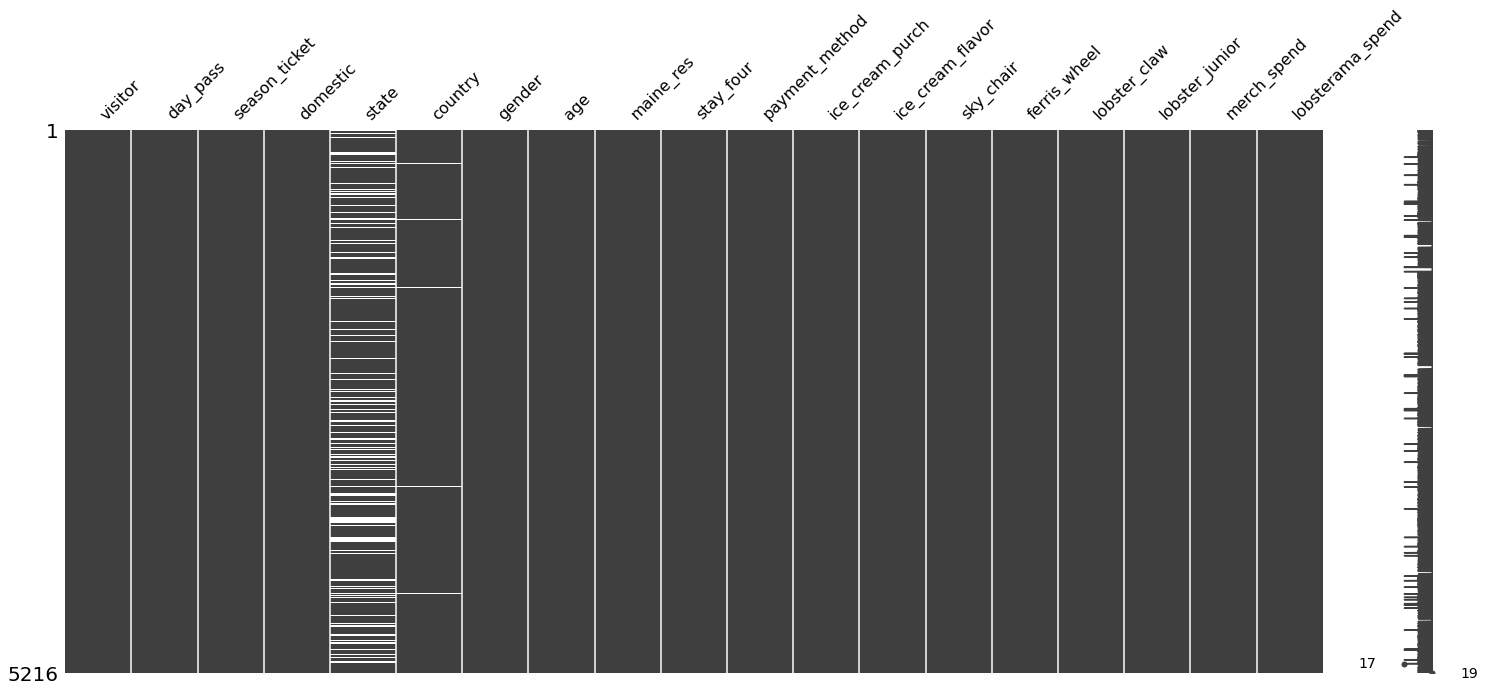

In [10]:
#(c)
import missingno as msno
msno.matrix(visitors)

<AxesSubplot:>

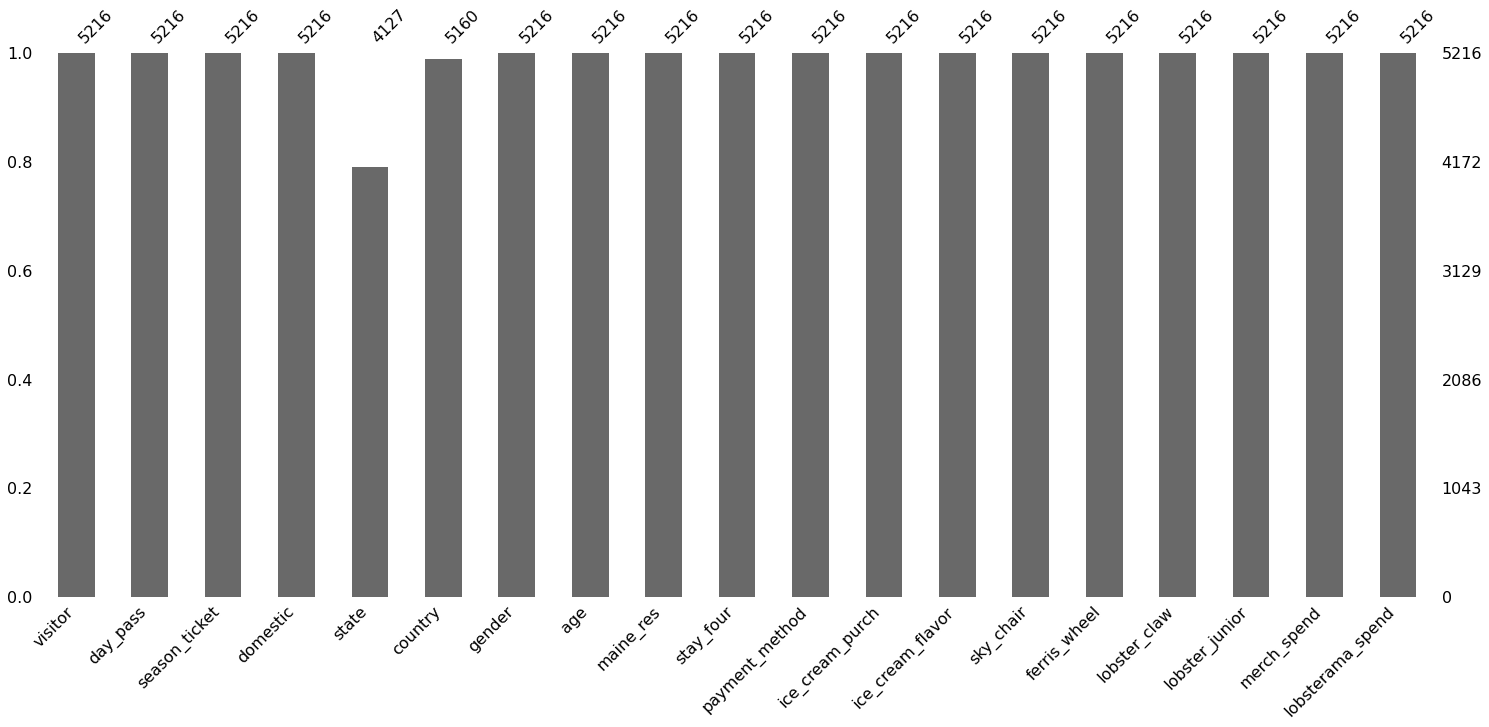

In [11]:
#(d)
msno.bar(visitors)

In [12]:
#(e)
subset = visitors[visitors['state'].isna()]
subset


,visitor,day_pass,season_ticket,domestic,state,country,gender,age,maine_res,stay_four,payment_method,ice_cream_purch,ice_cream_flavor,sky_chair,ferris_wheel,lobster_claw,lobster_junior,merch_spend,lobsterama_spend
4,5,1,No,0,NaN,MEX,1,44,No,1,0,1,Vanilla,0,1,0,0,61.019885,36.62
10,11,1,No,0,NaN,CAN,1,37,No,1,0,1,Vanilla,0,0,0,0,67.388926,35.51
12,13,1,No,0,NaN,CHN,1,38,No,1,0,0,None,1,1,1,1,58.118005,30.27
14,15,1,No,0,NaN,BRA,1,40,No,1,0,1,Vanilla,1,1,1,0,49.348397,28.40
17,18,1,No,0,NaN,CAN,0,31,No,1,0,1,Chocolate,1,0,1,1,58.279610,29.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,5203,1,No,0,NaN,CAN,0,34,No,1,0,1,Vanilla,1,1,0,0,48.311964,25.38
5205,5206,1,No,0,NaN,CAN,1,39,No,1,0,1,Chocolate,1,1,0,1,51.941870,29.45
5206,5207,1,No,0,NaN,CHN,0,38,No,1,0,0,None,0,1,0,1,63.488139,27.57
5207,5208,1,No,0,NaN,CAN,1,35,No,1,0,1,Chocolate,1,1,0,0,59.630414,32.26


In [13]:
visitors['domestic'].unique()

array([1, 0], dtype=int64)

*All of the missing value have“0” in the 'domestic' variable which means the person isn't a U.S. resident.*

In [14]:
# G (a)
visitors.loc[visitors['age'] < 15, 'age'] = 15
visitors

,visitor,day_pass,season_ticket,domestic,state,country,gender,age,maine_res,stay_four,payment_method,ice_cream_purch,ice_cream_flavor,sky_chair,ferris_wheel,lobster_claw,lobster_junior,merch_spend,lobsterama_spend
0,1,1,No,1,NY,USA,0,32,No,1,0,1,Vanilla,1,0,0,1,34.529611,24.95
1,2,0,Yes,1,Other,USA,1,43,No,1,0,1,Chocolate,0,0,1,0,23.811135,16.58
2,3,1,No,1,ME,USA,1,28,Yes,1,0,0,None,1,1,0,1,49.231936,29.94
3,4,0,Yes,1,NH,USA,1,35,No,0,0,0,None,0,1,1,0,55.508722,49.95
4,5,1,No,0,NaN,MEX,1,44,No,1,0,1,Vanilla,0,1,0,0,61.019885,36.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,5212,0,Yes,1,NH,USA,0,37,No,1,0,0,None,0,1,0,0,51.132212,22.17
5212,5213,1,No,0,NaN,UK,1,30,No,1,0,1,Vanilla,1,1,0,0,43.170379,23.71
5213,5214,0,Yes,1,NH,USA,1,36,No,0,0,1,Chocolate,1,0,0,0,37.488318,48.33
5214,5215,0,Yes,1,ME,USA,0,38,Yes,1,0,0,None,1,1,0,0,45.340795,34.59


In [15]:
# H (a)
percentage = visitors['stay_four'].mean() * 100
print(f"The percentage of guests who stayed at Lobster Land for more than four hours is: {percentage:.2f}%")

The percentage of guests who stayed at Lobster Land for more than four hours is: 59.93%


In [16]:
# (b)
visitors[(visitors['stay_four'] == '1') & (visitors['domestic'] == '1')]

,visitor,day_pass,season_ticket,domestic,state,country,gender,age,maine_res,stay_four,payment_method,ice_cream_purch,ice_cream_flavor,sky_chair,ferris_wheel,lobster_claw,lobster_junior,merch_spend,lobsterama_spend


In [17]:
# I 
visitors.drop('ice_cream_purch', axis=1)

,visitor,day_pass,season_ticket,domestic,state,country,gender,age,maine_res,stay_four,payment_method,ice_cream_flavor,sky_chair,ferris_wheel,lobster_claw,lobster_junior,merch_spend,lobsterama_spend
0,1,1,No,1,NY,USA,0,32,No,1,0,Vanilla,1,0,0,1,34.529611,24.95
1,2,0,Yes,1,Other,USA,1,43,No,1,0,Chocolate,0,0,1,0,23.811135,16.58
2,3,1,No,1,ME,USA,1,28,Yes,1,0,None,1,1,0,1,49.231936,29.94
3,4,0,Yes,1,NH,USA,1,35,No,0,0,None,0,1,1,0,55.508722,49.95
4,5,1,No,0,NaN,MEX,1,44,No,1,0,Vanilla,0,1,0,0,61.019885,36.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,5212,0,Yes,1,NH,USA,0,37,No,1,0,None,0,1,0,0,51.132212,22.17
5212,5213,1,No,0,NaN,UK,1,30,No,1,0,Vanilla,1,1,0,0,43.170379,23.71
5213,5214,0,Yes,1,NH,USA,1,36,No,0,0,Chocolate,1,0,0,0,37.488318,48.33
5214,5215,0,Yes,1,ME,USA,0,38,Yes,1,0,None,1,1,0,0,45.340795,34.59


*'ice_cream_purch' is useless, because all its information is contained in 'ice_cream_flavor'. If a visitor doesn't purchse ice cream, his 'ice_cream_flavor' should be "None".*

In [18]:
# J
visitors.rename(columns={'day_pass': 'day_pass_purch'})


,visitor,day_pass_purch,season_ticket,domestic,state,country,gender,age,maine_res,stay_four,payment_method,ice_cream_purch,ice_cream_flavor,sky_chair,ferris_wheel,lobster_claw,lobster_junior,merch_spend,lobsterama_spend
0,1,1,No,1,NY,USA,0,32,No,1,0,1,Vanilla,1,0,0,1,34.529611,24.95
1,2,0,Yes,1,Other,USA,1,43,No,1,0,1,Chocolate,0,0,1,0,23.811135,16.58
2,3,1,No,1,ME,USA,1,28,Yes,1,0,0,None,1,1,0,1,49.231936,29.94
3,4,0,Yes,1,NH,USA,1,35,No,0,0,0,None,0,1,1,0,55.508722,49.95
4,5,1,No,0,NaN,MEX,1,44,No,1,0,1,Vanilla,0,1,0,0,61.019885,36.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,5212,0,Yes,1,NH,USA,0,37,No,1,0,0,None,0,1,0,0,51.132212,22.17
5212,5213,1,No,0,NaN,UK,1,30,No,1,0,1,Vanilla,1,1,0,0,43.170379,23.71
5213,5214,0,Yes,1,NH,USA,1,36,No,0,0,1,Chocolate,1,0,0,0,37.488318,48.33
5214,5215,0,Yes,1,ME,USA,0,38,Yes,1,0,0,None,1,1,0,0,45.340795,34.59


# II. Data Visualization

<AxesSubplot:xlabel='maine_res', ylabel='merch_spend'>

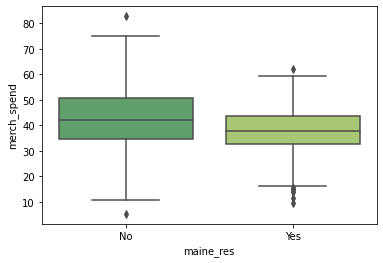

In [20]:
# K
sns.boxplot(x='maine_res', y='merch_spend',palette='summer', data=visitors)

*(a)
Visitors from non-Maine spend more on merchandise.This makes sense because visitors from other states will be more curious about lobsterland and will naturally spend more.*

,visitor,Subject,Count
0,1,sky_chair,1
1,2,sky_chair,0
2,3,sky_chair,1
3,4,sky_chair,0
4,5,sky_chair,0
...,...,...,...
20859,5212,lobster_claw,0
20860,5213,lobster_claw,0
20861,5214,lobster_claw,0
20862,5215,lobster_claw,0


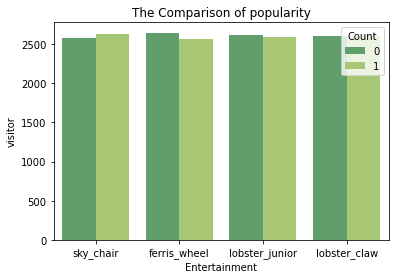

In [20]:
# L
melted = pd.melt(visitors, id_vars=['visitor'], value_vars=['sky_chair', 'ferris_wheel', 'lobster_junior','lobster_claw'], var_name='Subject', value_name='Count')
sns.barplot(x='Subject',y='visitor',hue='Count',palette='summer',ci= None, data=melted)
plt.xlabel('Entertainment')
plt.title('The Comparison of popularity')
melted


Text(0.5, 1.0, 'The ages of people who visited Lobster Land on July 4th, 2021')

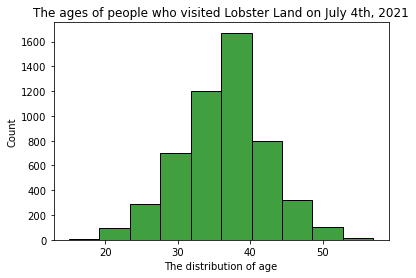

In [21]:
# M
sns.histplot(x='age',bins=10,color='green',data=visitors)
plt.xlabel('The distribution of age')
plt.title('The ages of people who visited Lobster Land on July 4th, 2021')

*(a)
By increasing the value of 'bins=',we can increase the number of bins in the histogram.*

Text(0.5, 1.0, 'The ages of people who visited Lobster Land on July 4th, 2021')

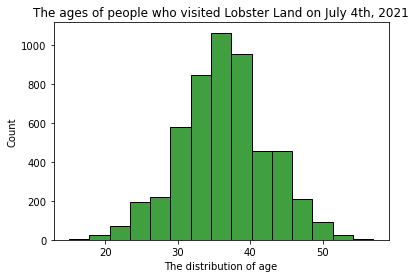

In [22]:
#(b)
sns.histplot(x='age',bins=15 ,color='green', data=visitors)
plt.xlabel('The distribution of age')
plt.title('The ages of people who visited Lobster Land on July 4th, 2021')

*(c)
Increasing the number of bins can provide more detail but can also introduce more noise and bias. It is important to choose an appropriate number of bins that balances the desire for detail with the need for a reliable and interpretable visualization.*

Text(0.5, 1.0, 'The age distribution of those visitors who went on the Lobster Junior')

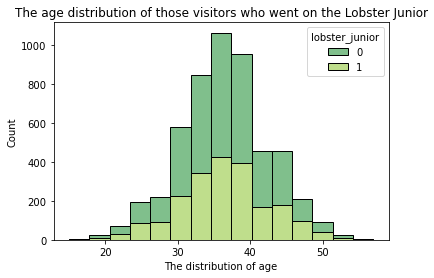

In [23]:
#(d)
sns.histplot(x='age',bins=15,hue='lobster_junior',multiple='stack', palette='summer',data=visitors)
plt.xlabel('The distribution of age')
plt.title('The age distribution of those visitors who went on the Lobster Junior')

*This result seems strange because lobster is a kid's roller coaster, but it is reasonable because the age between 30-40 years old may be very likely to accompany their children to do roller coasters.*

Text(0.5, 1.0, 'The international visitors to Lobster Land on July 4th')

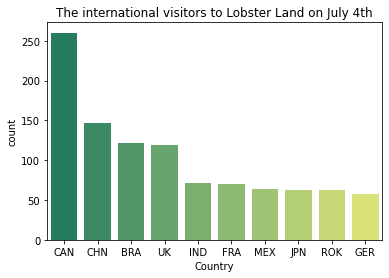

In [24]:
# N
subset=visitors.loc[visitors['country'] != 'USA']
sns.countplot(x="country", palette='summer',data=subset,order=subset['country'].value_counts().index)
plt.xlabel('Country')
plt.title('The international visitors to Lobster Land on July 4th')

*(a)
The largest number of visitors to Lobsterland on July 4th came from Canada, followed by China, and the least from Germany.*

Text(0.5, 1.0, 'Payment methods for visitors from different countries')

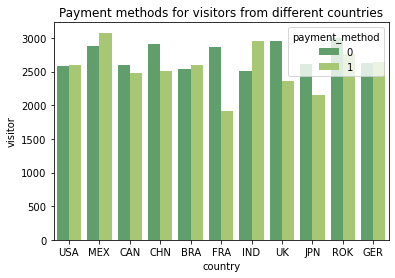

In [25]:
# O
sns.barplot(x="country", y="visitor",hue='payment_method',palette='summer',ci= None, data=visitors)
plt.title('Payment methods for visitors from different countries')

*Among tourists from different countries, the most paid in cash are Mexicans.*

#Part III: Wildcard: Metrics and “Quantified Self”

*I measured the daily number of deliveries received by the courier office of Watermark Apartments (the apartment where I live) for three days from Feb. 16 to Feb. 18. There were a total of 308 express deliveries on February 16, of which 198 were delivered in the morning and 110 in the early afternoon. For February 17, we had 324 deliveries in total,258 for the morning and 66 for the early afternoon. For February 18, we had 254 deliveries in total,185 for the morning and 69 for the early afternoon. 
From the three days of data we can see the number of weekday couriers than the weekend, I guess the reason may be that UPS suspended delivery on the weekend and so on. In my experience, the number of packages in the apartment mailroom during sale seasons like Black Friday can spike.
I think this issue is worthy of in-depth long-term research, research deliveries can determine the consumer's purchase cycle, purchase frequency, shopping habits, etc. Also can analyze the delivery situation of logistics companies.*